In [1]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [2]:
fs = (15,10)

In [3]:
file = "blues.00000.wav"

In [4]:
signal,sr = librosa.load(file,sr=22050)

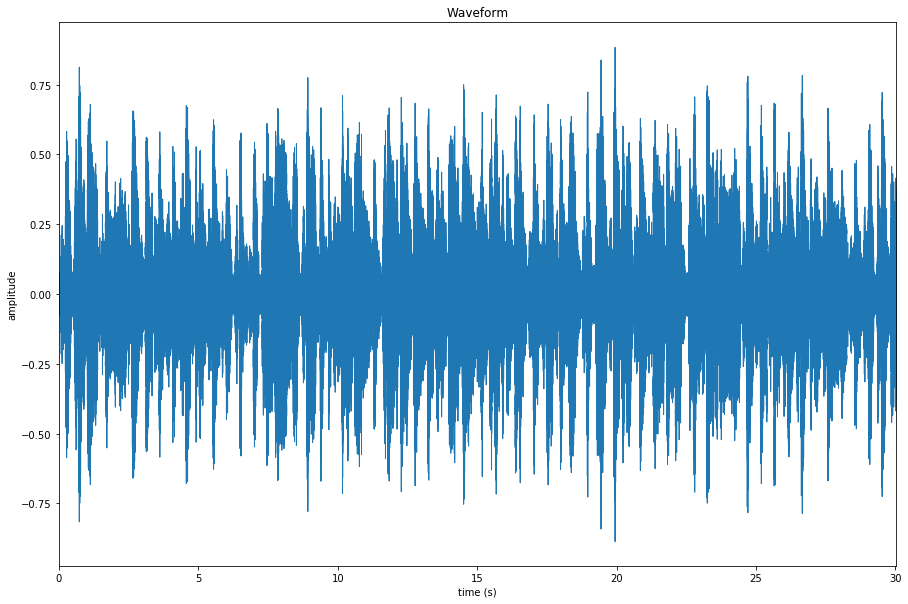

In [5]:
plt.figure(figsize=fs)
librosa.display.waveplot(signal,sr=sr)
plt.xlabel("time (s)")
plt.ylabel("amplitude")
plt.title("Waveform")
plt.show()

In [6]:
fft = np.fft.fft(signal)

In [7]:
fft

array([-39.499096+0.j        , -18.645905+0.36795086j,
       -18.550415+0.07651901j, ..., -18.529016+0.03127937j,
       -18.550415-0.07651901j, -18.645905-0.36795086j], dtype=complex64)

In [8]:
fft.shape

(661794,)

In [9]:
spectrum = np.abs(fft)

In [10]:
f = np.linspace(0,sr,len(spectrum))

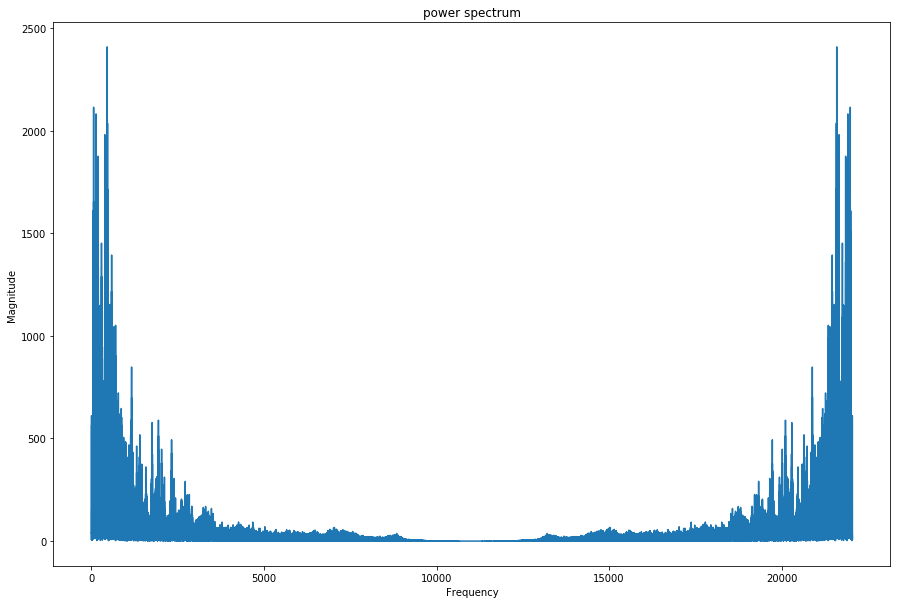

In [11]:
plt.figure(figsize=fs)
plt.plot(f,spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")
plt.title("power spectrum")
plt.show()

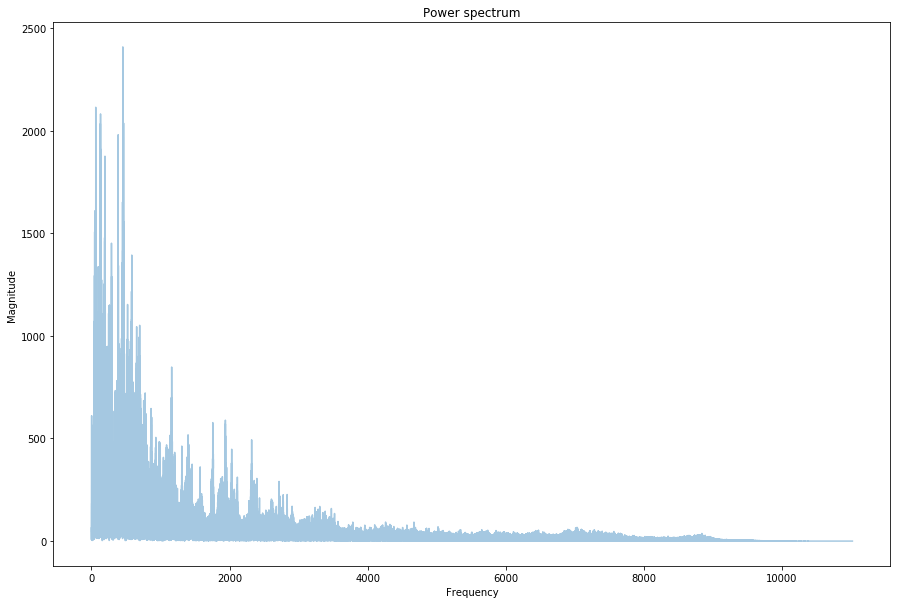

In [12]:
plt.figure(figsize=fs)
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")
plt.show()


In [13]:
hop_length = 512
n_fft      =2048
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr
stft = librosa.stft(signal,n_fft = n_fft,hop_length=hop_length)
spectrogram = np.abs(stft)

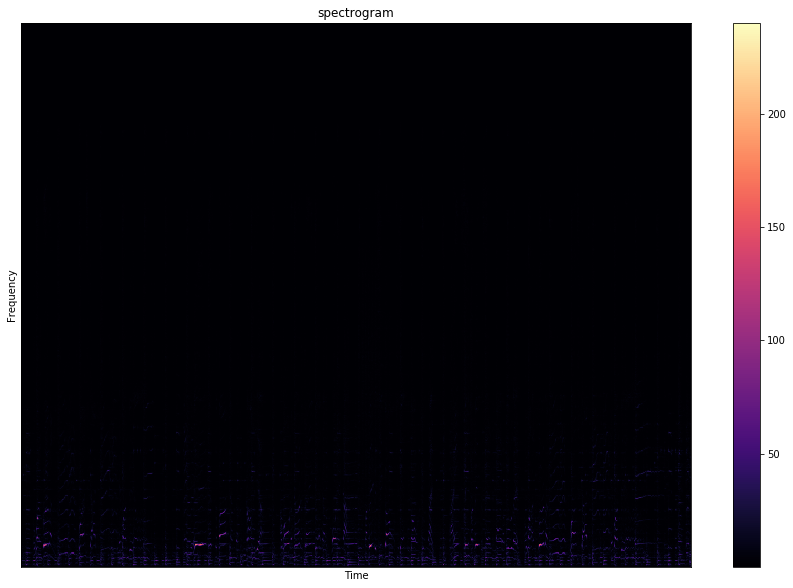

In [14]:
plt.figure(figsize=fs)
librosa.display.specshow(spectrogram,sr=sr,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.title("spectrogram")
plt.colorbar()
plt.show()


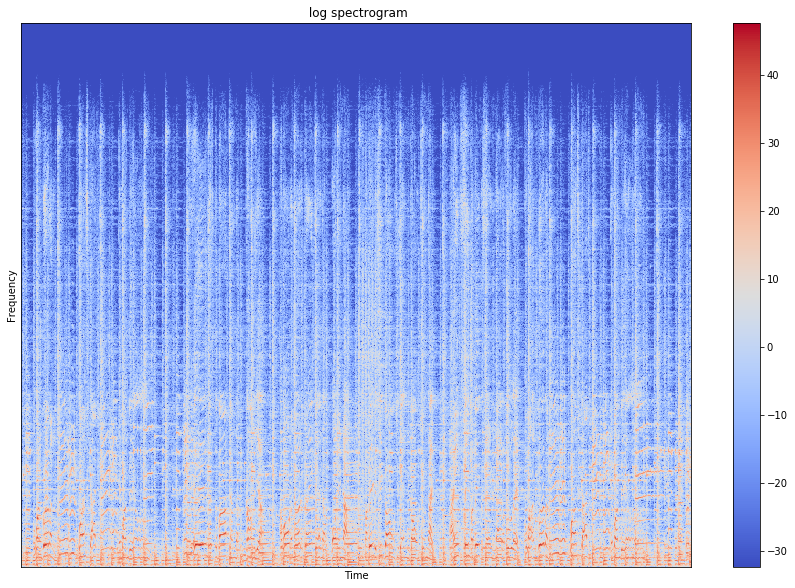

In [15]:
log_spectrum = librosa.amplitude_to_db(spectrogram)
plt.figure(figsize=fs)
librosa.display.specshow(log_spectrum,sr=sr,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title(" log spectrogram")
plt.show()


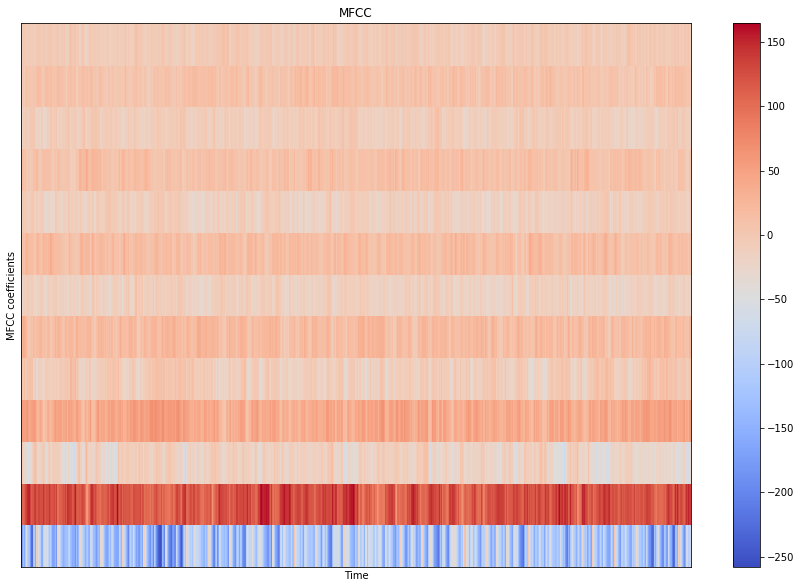

In [16]:
# n_fft -> the amount of samples we consider for a single forier transform
# hop_length -> length to slide to the left to get new samples
MFCCs = librosa.feature.mfcc(signal,sr=sr,n_fft=n_fft,hop_length=hop_length,n_mfcc=13)
plt.figure(figsize=fs)
librosa.display.specshow(MFCCs,sr=sr,hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.title("MFCC")
plt.colorbar()
plt.show()

In [17]:
MFCCs

array([[-211.48465   , -208.94481   , -193.90889   , ..., -109.999146  ,
         -86.84641   ,  -79.03764   ],
       [  99.022964  ,  101.24678   ,  102.24396   , ...,  150.07935   ,
         138.89685   ,  140.24707   ],
       [ -10.634699  ,   -9.346699  ,    1.9154348 , ...,  -50.795135  ,
         -36.613983  ,  -31.443943  ],
       ...,
       [  -2.1509948 ,   -3.7085578 ,   -9.185015  , ...,  -12.147305  ,
          -9.283383  ,  -11.596716  ],
       [  -2.5450842 ,    0.64133793,   -2.1272187 , ...,    6.2527533 ,
           2.7007575 ,    1.2497692 ],
       [  -2.3836367 ,   -1.6919363 ,   -3.8449044 , ...,    4.9566736 ,
          -2.6966052 ,   -7.690168  ]], dtype=float32)

In [18]:
MFCCs.shape

(13, 1293)

In [23]:
MFCCs.tolist()

AttributeError: 'list' object has no attribute 'shape'

In [24]:
MFCCs.shape

(13, 1293)

In [25]:
import json
import math 
import librosa
import os

In [26]:
dataset_path = "C:/Users/admin/Documents/Data/genres_original"

sample_rate  = 22050
track        = 30
sample_per_track = sample_rate * track

In [ ]:
def save_mfcc(dataset_path, json_path,SAMPLES_PER_TRACK,SAMPLE_RATE, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along witgh genre labels.
        :param dataset_path (str): Path to dataset
        :param json_path (str): Path to json file used to save MFCCs
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = (dirpath.split("/")[-1]).split("\\")[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

		        # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))
    return data
    
    

    

In [ ]:
#final_data = save_mfcc(dataset_path,json_path,SAMPLES_PER_TRACK=sample_per_track,SAMPLE_RATE=sample_rate,num_segments=10)

In [ ]:
'''
j = json.dumps(final_data)
with open("final_data.json","w") as f:
    f.write(j)
    f.close()
'''

In [27]:
final_data = json.load(open("final_data.json"))

In [28]:
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras

In [29]:
x = np.array(final_data["mfcc"])
y = np.array(final_data["labels"])

In [30]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size = 0.3)

In [31]:
x.shape

(9986, 130, 13)

In [32]:
x[1].shape

(130, 13)

In [ ]:
# neural network
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(x.shape[1], x.shape[2])),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(256, activation="relu"),
        keras.layers.Dense(64, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
#history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=50)

In [ ]:

fig, axs = plt.subplots(2)

    # create accuracy sublpot
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")

    # create error sublpot
axs[1].plot(history.history["loss"], label="train error")
axs[1].plot(history.history["val_loss"], label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

plt.show()

In [ ]:
# neural network with drop out
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(x.shape[1], x.shape[2])),

        keras.layers.Dense(512, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
    
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        keras.layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),

        keras.layers.Dense(10, activation='softmax')
    ])

optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=50)

In [ ]:
fig, axs = plt.subplots(2)

    # create accuracy sublpot
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")

    # create error sublpot
axs[1].plot(history.history["loss"], label="train error")
axs[1].plot(history.history["val_loss"], label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

plt.show()

In [ ]:
# 
model = keras.Sequential()
model.add(keras.layers.LSTM(64, input_shape= (x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()


In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=30)

In [ ]:
fig, axs = plt.subplots(2)

    # create accuracy sublpot
axs[0].plot(history.history["accuracy"], label="train accuracy")
axs[0].plot(history.history["val_accuracy"], label="test accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy eval")

    # create error sublpot
axs[1].plot(history.history["loss"], label="train error")
axs[1].plot(history.history["val_loss"], label="test error")
axs[1].set_ylabel("Error")
axs[1].set_xlabel("Epoch")
axs[1].legend(loc="upper right")
axs[1].set_title("Error eval")

plt.show()

In [33]:
import pandas as pd